# XGBoost

Este notebook utiliza el modelo XGBoost para predecir la temperatura a partir de variables climáticas históricas.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

# Cargar y preparar los datos
df = pd.read_csv("Historia_Climatica.csv")

# Variables predictoras y objetivo
X = df.drop(columns=["Fecha_Hora", "Temperatura_C"])
y = df["Temperatura_C"]

# Convertir variables categóricas
X = pd.get_dummies(X, drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

In [5]:
# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo XGBoost
modelo = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [7]:
# Evaluación del modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 22162.494140625
R²: -0.09110784530639648


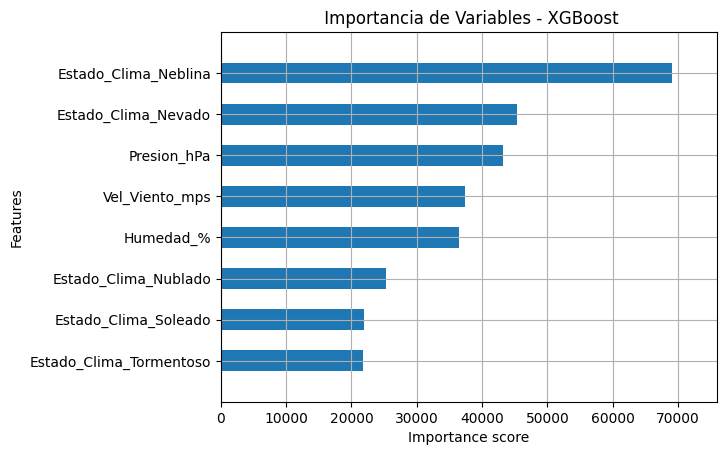

In [9]:
# Importancia de las variables
xgb.plot_importance(modelo, height=0.5, importance_type='gain', show_values=False)
plt.title(" Importancia de Variables - XGBoost")
plt.grid(True)
plt.show()


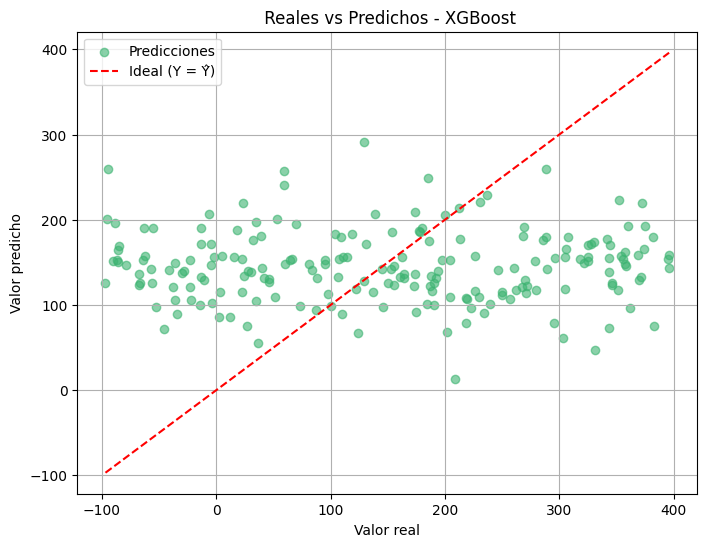

In [11]:
# Visualización real vs. predicho
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='mediumseagreen', alpha=0.6, label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal (Y = Ŷ)")
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title(" Reales vs Predichos - XGBoost")
plt.legend()
plt.grid(True)
plt.show()
